In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
X_train_full = pd.read_csv("../data/train_with_ED_Ticker.csv")
X_train = X_train_full.drop(columns=['Ticker', 'Earnings Date'])
y_train = pd.read_csv("../data/train_labels.csv")

X_test_full = pd.read_csv("../data/test_with_ED_Ticker.csv")
X_test = X_test_full.drop(columns=['Ticker', 'Earnings Date'])

X_test_full["pred_eps_beat"] = pd.read_csv("../data/stacking_predictions.csv")

In [ ]:
X_strats = pd.read_csv("../data/updated_collated.csv")
stock_data = pd.merge(X_strats, X_test_full,  how='right', left_on=['Earnings Date Different format','Ticker'], right_on=['Earnings Date','Ticker'])
stock_data["pred_eps_beat"].describe()

count    196.000000
mean       0.846939
std        0.360969
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: pred_eps_beat, dtype: float64

In [ ]:
#Only second strategy used for evaluation as we have established that this is the most suitable 'simple/naive' strategy to make use of accurate EPS Beat predictions
print("Only second strategy used for evaluation as we have established that this is the most suitable 'simple/naive' strategy to make use of accurate EPS Beat predictions")
stock_data["second_strat_profit"] = float('nan')

stock_data["second_strat_profit"] = np.where(stock_data["pred_eps_beat"] == 1, stock_data["second_strat"], stock_data["second_strat_profit"])

stock_data["second_strat_profit"] = np.where(stock_data["pred_eps_beat"] == 0, -stock_data["second_strat"], stock_data["second_strat_profit"])

Only second strategy used for evaluation as we have established that this is the most suitable 'simple/naive' strategy to make use of accurate EPS Beat predictions


In [ ]:
stock_data.describe()

,Unnamed: 0.1,Unnamed: 0,EPS Estimate,Reported EPS,Surprise(%),Price Change,Coefficient Variation of Stock Price,Percentage Change from prev reported EPS,EPS Beats,two_day_before,...,Financial Services,Healthcare,Industrials,Real Estate,Technology,quarter_1,quarter_2,quarter_3,quarter_4,pred_eps_beat
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,473.040816,4.642857,0.531888,0.599949,-0.234851,0.088761,0.113649,-0.219204,0.673469,104.713074,...,0.025510,0.091837,0.061224,0.051020,0.301020,0.270408,0.270408,0.234694,0.224490,0.846939
std,283.743525,3.350469,1.231237,1.426464,5.735210,0.735221,0.112097,0.848768,0.470145,167.441467,...,0.158073,0.289535,0.240356,0.220603,0.459876,0.445308,0.445308,0.424893,0.418314,0.360969
min,2.000000,0.000000,-3.010000,-3.070000,-68.272700,-0.756427,0.011106,-6.000000,0.000000,1.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212.000000,2.000000,-0.070000,-0.080000,-0.066700,-0.164826,0.054356,-0.465424,0.000000,17.854843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,469.500000,4.000000,0.245000,0.380000,0.087100,0.002868,0.079428,-0.137205,1.000000,55.948540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,729.250000,7.000000,0.952500,1.080000,0.348350,0.184822,0.143233,0.064382,1.000000,131.560867,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,974.000000,11.000000,10.330000,9.870000,16.250000,6.937008,0.887819,3.444444,1.000000,1578.650024,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
stock_data['eps_date'] = pd.to_datetime(stock_data['Earnings Date_x'], dayfirst=True)
stock_data = stock_data.sort_values('eps_date')
stock_data

,Unnamed: 0.1,Unnamed: 0,Earnings Date_x,EPS Estimate,Reported EPS,Surprise(%),Previous Earnings Date,Price Change,Coefficient Variation of Stock Price,Percentage Change from prev reported EPS,...,Industrials,Real Estate,Technology,quarter_1,quarter_2,quarter_3,quarter_4,Earnings Date_y,pred_eps_beat,eps_date
44,747,11,7/8/2019,0.19,0.35,0.8135,2/5/2019,-0.244444,0.103019,-0.136364,...,0,0,1,0.0,0.0,1.0,0.0,2019-08-07,1,2019-08-07
14,649,9,8/8/2019,-0.02,-0.03,-0.5000,9/5/2019,-0.174194,0.052732,-0.600000,...,0,0,0,0.0,0.0,1.0,0.0,2019-08-08,1,2019-08-08
131,336,10,15/10/2019,1.62,1.66,0.0222,17/7/2019,0.268293,0.063462,0.275591,...,0,0,1,0.0,0.0,0.0,1.0,2019-10-15,1,2019-10-15
102,261,11,24/10/2019,0.47,0.53,0.1373,25/7/2019,0.338212,0.112842,0.678571,...,0,0,0,0.0,0.0,0.0,1.0,2019-10-24,1,2019-10-24
0,229,11,30/10/2019,1.91,2.12,0.1094,24/7/2019,-0.064044,0.032767,1.098901,...,0,0,0,0.0,0.0,0.0,1.0,2019-10-30,1,2019-10-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,906,0,11/8/2022,-0.43,-0.53,-0.2383,10/5/2022,-0.148423,0.115021,-0.232143,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-11,0,2022-08-11
69,700,0,11/8/2022,-0.08,-0.15,-0.8987,12/5/2022,0.414313,0.186399,-0.111111,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-11,1,2022-08-11
185,792,0,18/8/2022,1.79,1.86,0.0368,12/5/2022,0.237287,0.056797,-0.005556,...,0,0,1,0.0,0.0,1.0,0.0,2022-08-18,1,2022-08-18
43,822,0,29/8/2022,2.76,7.54,1.7339,27/5/2022,0.426902,0.110400,-0.064407,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-29,1,2022-08-29


In [ ]:
stock_data.tail(10) #the 'trades' have been sorted by date in ascending order.

,Unnamed: 0.1,Unnamed: 0,Earnings Date_x,EPS Estimate,Reported EPS,Surprise(%),Previous Earnings Date,Price Change,Coefficient Variation of Stock Price,Percentage Change from prev reported EPS,...,Industrials,Real Estate,Technology,quarter_1,quarter_2,quarter_3,quarter_4,Earnings Date_y,pred_eps_beat,eps_date
192,84,0,4/8/2022,-0.21,-0.24,-0.1429,9/5/2022,0.346645,0.122786,-0.676923,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-04,1,2022-08-04
68,511,0,8/8/2022,-0.14,-0.30,-1.0690,9/5/2022,-0.095872,0.056440,-0.300000,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-08,0,2022-08-08
33,286,0,8/8/2022,-2.23,-2.40,-0.0777,9/5/2022,0.825353,0.165736,-0.038793,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-08,0,2022-08-08
188,450,0,9/8/2022,1.33,1.60,0.2030,9/5/2022,-0.012134,0.067789,0.156522,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-09,1,2022-08-09
134,552,0,9/8/2022,-0.61,-0.52,0.1475,4/5/2022,0.710177,0.230549,0.089286,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-09,1,2022-08-09
182,906,0,11/8/2022,-0.43,-0.53,-0.2383,10/5/2022,-0.148423,0.115021,-0.232143,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-11,0,2022-08-11
69,700,0,11/8/2022,-0.08,-0.15,-0.8987,12/5/2022,0.414313,0.186399,-0.111111,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-11,1,2022-08-11
185,792,0,18/8/2022,1.79,1.86,0.0368,12/5/2022,0.237287,0.056797,-0.005556,...,0,0,1,0.0,0.0,1.0,0.0,2022-08-18,1,2022-08-18
43,822,0,29/8/2022,2.76,7.54,1.7339,27/5/2022,0.426902,0.110400,-0.064407,...,0,0,0,0.0,0.0,1.0,0.0,2022-08-29,1,2022-08-29
172,967,0,12/10/2022,1.84,1.97,0.0683,12/7/2022,-0.044363,0.026035,-0.010753,...,0,0,0,0.0,0.0,0.0,1.0,2022-10-12,1,2022-10-12


In [ ]:
stock_data['second_strat_profit'].describe()

count    196.000000
mean       0.020798
std        0.127770
min       -0.366972
25%       -0.044010
50%        0.012569
75%        0.081653
max        0.419711
Name: second_strat_profit, dtype: float64

In [ ]:
import math
trade_count = [0]
curr_trade = 0
total_earning_list = [1]
total_earning = 1
for index, row in stock_data.iterrows():
    if math.isnan(row['second_strat_profit']) == False:
        curr_trade += 1
        total_earning *= (1 + row['second_strat_profit'])
        trade_count.append(curr_trade)
        total_earning_list.append((total_earning*100)-100)
        
print("The total returns using Investment Strategy with Final Model's Predictions of EPS Beats:")
print(str(total_earning_list[-1])+"%")

The total returns using Investment Strategy with Final Model's Predictions of EPS Beats:
1101.9148308913%


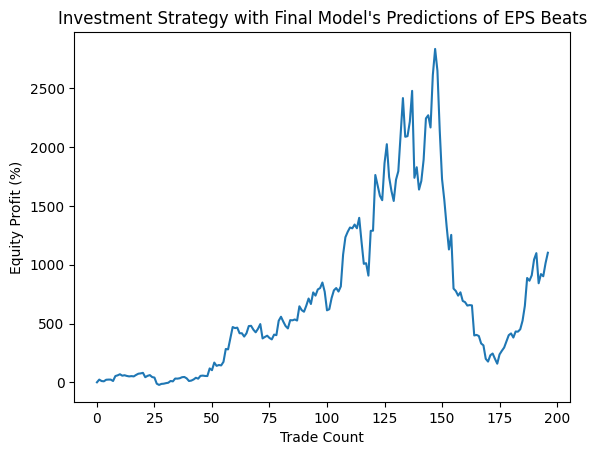

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(trade_count, total_earning_list)
plt.title("Investment Strategy with Final Model's Predictions of EPS Beats")
plt.xlabel('Trade Count')
plt.ylabel('Equity Profit (%)')
plt.show()

While highly volatile, with the average trade gain being 2.08%, the final returns is at 1101.91% profit. Next we compare to the baseline where we naively assume all stocks will beat EPS

stock_data['second_strat'].describe()

In [ ]:
import math
trade_count = [0]
curr_trade = 0
total_earning_list = [1]
total_earning = 1
for index, row in stock_data.iterrows():
    if math.isnan(row['second_strat']) == False:
        curr_trade += 1
        total_earning *= (1 + row['second_strat'])
        trade_count.append(curr_trade)
        total_earning_list.append((total_earning*100)-100)
        
print("The total returns using Baseline 'Investment Strategy' assuming every stock will beat EPS:")
print(str(total_earning_list[-1])+"%")

The total returns using Baseline 'Investment Strategy' assuming every stock will beat EPS:
15.764499562460827%


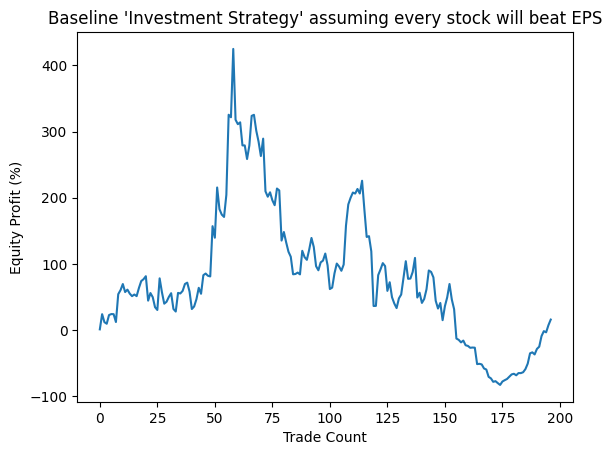

In [ ]:
import matplotlib.pyplot as plt
  
plt.plot(trade_count, total_earning_list)
plt.title("Baseline 'Investment Strategy' assuming every stock will beat EPS")
plt.xlabel('Trade Count')
plt.ylabel('Equity Profit (%)')
plt.show()

While still highly volatile, with the average trade gain being near 0%, the final returns is at 15.76% profit.